# SECCION 1: OBTENCION DE DATOS

Importacion de librerias y modulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

Carga de datos

In [ ]:
#Importacion de dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/afluencia-preliminar-en-transporte-publico.xlsx-afluencia_diaria.csv', encoding = 'utf-8')
df

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238"
1,2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,"29,475"
2,3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,"31,855"
3,4,Ecobici,NaN,Miércoles,2020-03-04,NaN,NaN,"31,477"
4,5,Ecobici,NaN,Jueves,2020-03-05,NaN,NaN,"31,493"
...,...,...,...,...,...,...,...,...
18709,18710,Suburbano,L1,Lunes,2021-06-28,NaN,NaN,NaN
18710,18711,Suburbano,L1,Martes,2021-06-29,NaN,NaN,NaN
18711,18712,Suburbano,L1,Miércoles,2021-06-30,NaN,NaN,NaN
18712,18713,Suburbano,L1,Jueves,2021-07-01,NaN,NaN,NaN


¿Cuál es la columna con más datos no nulos?

In [ ]:
df.notnull().sum().sort_values(ascending = False)

id                            18714
organismo                     18714
dia                           18714
fecha                         18714
afluencia_total_preliminar    18512
linea_servicio                18225
afluencia_boleto               3598
afluencia_tarjeta              2687
dtype: int64

¿Son todos los tipos de datos para las columnas correctos?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          18714 non-null  int64 
 1   organismo                   18714 non-null  object
 2   linea_servicio              18225 non-null  object
 3   dia                         18714 non-null  object
 4   fecha                       18714 non-null  object
 5   afluencia_tarjeta           2687 non-null   object
 6   afluencia_boleto            3598 non-null   object
 7   afluencia_total_preliminar  18512 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


¿Cuál es el organismo más utilizado?

In [ ]:
df.organismo.value_counts()

STC                5868
STE-Trolebús       4126
RTP                3671
Metrobús           3461
Ecobici             489
STE-Tren Ligero     489
Suburbano           489
STE-Cablebús        121
Name: organismo, dtype: int64

¿Cuál es la línea de servicio más utilizada?

In [ ]:
df.linea_servicio.value_counts()

L1                                                   1467
L5                                                    978
L7                                                    978
L6                                                    978
L2                                                    978
L4                                                    978
L3                                                    978
L1 Eje Central                                        489
L6 Rosario-Chapultepec                                489
L12                                                   489
LB                                                    489
LA                                                    489
L9                                                    489
L8                                                    489
L4 Pto Aéreo-Rosario                                  489
L5 Sn Felipe-Hidalgo                                  489
Xochimilco-Tasqueña                                   489
Expreso Direct

In [ ]:
df.groupby(["linea_servicio","organismo"]).count().sort_values(by=["organismo"])

,,id,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
linea_servicio,organismo,,,,,,
L6,Metrobús,489,489,489,0,0,487
L3,Metrobús,489,489,489,0,0,487
L7,Metrobús,489,489,489,0,0,487
L2,Metrobús,489,489,489,0,0,487
LT1 (Atlalilco-Tláhuac),Metrobús,26,26,26,0,0,24
LT2 (Coyuya-Tláhuac),Metrobús,12,12,12,0,0,10
L5,Metrobús,489,489,489,0,0,487
L4,Metrobús,489,489,489,0,0,487
L1,Metrobús,489,489,489,0,0,487


¿Qué día de la semana tiene más uso de transporte público? ¿Por cuánto?

In [ ]:
df = df.replace({'dia': 'Míercoles'}, {'dia': 'Miércoles'}, regex = True)
df.dia.value_counts()

Martes       2681
Jueves       2681
Viernes      2681
Miércoles    2680
Lunes        2679
Domingo      2674
Sábado       2638
Name: dia, dtype: int64

In [ ]:
df.groupby(["dia"]).count().sort_values(by=['afluencia_total_preliminar'], ascending=False)

,id,organismo,linea_servicio,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
dia,,,,,,,
Martes,2681,2681,2611,2681,387,523,2667
Lunes,2679,2679,2609,2679,388,521,2665
Miércoles,2680,2680,2610,2680,392,524,2659
Jueves,2681,2681,2611,2681,390,525,2649
Domingo,2674,2674,2604,2674,368,489,2631
Viernes,2681,2681,2611,2681,381,514,2626
Sábado,2638,2638,2569,2638,381,502,2615


In [ ]:
#df.groupby(["dia","organismo"]).count().sort_values(by=["dia"])

# SECCION 2: ANALISIS EXPLORATORIO

¿Son los tipos de datos para cada columna correctos? ¿Cuáles sí y cuáles no?
Notarás que las columnas de afluencias  son de tipo objeto. Cambialas a valores numéricos.
Hint: encontrarás errores al momento de convertirlas, debido a que contienen el string “,”. Retira este string antes de convertirlos utilizando .str.replace, y después conviértelos a datos numéricos.



In [ ]:
#fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

#afluencias a numericos
df['afluencia_total_preliminar'] = df['afluencia_total_preliminar'].str.replace(',','')
df['afluencia_boleto'] = df['afluencia_boleto'].str.replace(',','')
df['afluencia_tarjeta'] = df['afluencia_tarjeta'].str.replace(',','')

df[['afluencia_total_preliminar', 'afluencia_boleto', 'afluencia_tarjeta']] = df[['afluencia_total_preliminar', 'afluencia_boleto', 'afluencia_tarjeta']].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          18714 non-null  int64         
 1   organismo                   18714 non-null  object        
 2   linea_servicio              18225 non-null  object        
 3   dia                         18714 non-null  object        
 4   fecha                       18714 non-null  datetime64[ns]
 5   afluencia_tarjeta           2687 non-null   float64       
 6   afluencia_boleto            3598 non-null   float64       
 7   afluencia_total_preliminar  18512 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.1+ MB


Responde a las siguientes preguntas:
¿Cuáles son las columnas con mayor cantidad de datos nulos? Crea el siguiente dataframe y pega las líneas de código que utilizaste en donde se muestre el porcentaje de datos nulos por columna.

In [ ]:
df.isnull()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,False,False,True,False,False,True,True,False
1,False,False,True,False,False,True,True,False
2,False,False,True,False,False,True,True,False
3,False,False,True,False,False,True,True,False
4,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...
18709,False,False,False,False,False,True,True,True
18710,False,False,False,False,False,True,True,True
18711,False,False,False,False,False,True,True,True
18712,False,False,False,False,False,True,True,True


In [ ]:
from tables import index

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing}).sort_values(by = 'percent_missing', ascending = False)
missing_value_df

,column_name,percent_missing
afluencia_tarjeta,afluencia_tarjeta,85.641766
afluencia_boleto,afluencia_boleto,80.773752
linea_servicio,linea_servicio,2.613017
afluencia_total_preliminar,afluencia_total_preliminar,1.079406
id,id,0.000000
organismo,organismo,0.000000
dia,dia,0.000000
fecha,fecha,0.000000


Responde a las siguientes preguntas:
Una vez que hayas creado el DataFrame, crea una gráfica de barras visualizando el porcentaje de datos nulos utilizando la librería plotly. En el eje x estará la columna, (id, organismo, etc.) y en el eje y estará el porcentaje. Pega aquí tu gráfica.

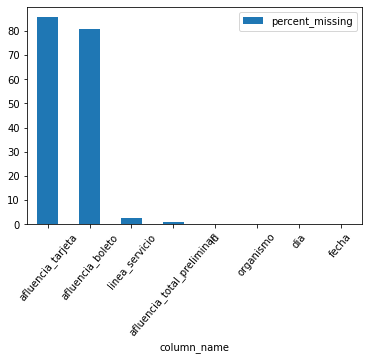

In [ ]:
ax = missing_value_df.plot.bar(x='column_name', y='percent_missing', rot=50)

In [ ]:
df[df["afluencia_boleto"].isnull()]["organismo"].value_counts()[:]

STC                5868
STE-Trolebús       4126
Metrobús           3461
Ecobici             489
STE-Tren Ligero     489
Suburbano           489
STE-Cablebús        121
RTP                  73
Name: organismo, dtype: int64

Haciendo relación con la pregunta anterior, piensa en diferentes situaciones del registro de datos y por qué sí o por qué no estas tendrían valores nulos. Por ejemplo, esperaríamos que la columna de línea de servicio esté vacía cuando se usa ecobici, pues esta no tiene líneas. Crea una función que, dado un organismo, grafique la distribución de valores nulos cuando se tiene ése organismo, y pega la distribución de valores nulos para las demás columnas para el caso de ecobici.


In [ ]:
df[df['linea_servicio'].isnull()]['organismo'].value_counts()

Ecobici    489
Name: organismo, dtype: int64

In [ ]:
df_org = df[df['organismo'] =='Ecobici'].isnull().sum() * 100 / df[df['organismo'] =='Ecobici'].isnull().shape[0]
missing_value_org = pd.DataFrame({'column_name': df.columns,'percent_missing': df_org}).sort_values(by = 'percent_missing', ascending = False)
missing_value_org

,column_name,percent_missing
linea_servicio,linea_servicio,100.000000
afluencia_tarjeta,afluencia_tarjeta,100.000000
afluencia_boleto,afluencia_boleto,100.000000
afluencia_total_preliminar,afluencia_total_preliminar,0.204499
id,id,0.000000
organismo,organismo,0.000000
dia,dia,0.000000
fecha,fecha,0.000000


In [ ]:
#Funcion para validar los organismos con valores nulos
def organismo_data_null(organismo):

  percent_missing = (df[df['organismo'] == organismo].isnull().sum() * 100 / df[df['organismo'] == organismo].isnull().shape[0]).sort_values(ascending = False)

  return percent_missing.plot.bar(y = percent_missing, rot = 50)


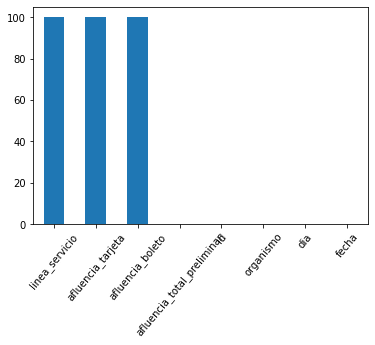

In [ ]:
organismo_data_null('Ecobici')

Reto
Crea la misma gráfica, que anteriormente, pero en lugar de revisar los datos nulos cuando se utiliza un organismo en específico, revisa la distribución de organismos, dada una columna es nula. Por ejemplo: para los valores nulos de la columna de linea_servicio, ¿qué porción de estos son debido a ecobici? Los que no, ¿a qué se le pueden atribuir? Pega la distribución para la columna de afluencia_tarjeta.
Análisis como estos son los que se deben de tomar en consideración a la hora de limpiar datos. Regresando al ejemplo, si se tienen datos nulos en la columna de linea_servicio que NO se les pueden dar una explicación o justificación, se consideran errores en la captura de datos, y se eliminan.


In [ ]:
#Validando en funcion de las columnas los nulos debido a organismos
df_col = df[df['afluencia_tarjeta'].isnull()].groupby('organismo').size() * 100 / df[df['afluencia_tarjeta'].isnull()].shape[0]
missing_value_col = pd.DataFrame({'percent_missing': df_col}).sort_values(by = 'percent_missing', ascending = False)
missing_value_col


,percent_missing
organismo,
STC,36.613215
STE-Trolebús,25.744057
Metrobús,21.594809
RTP,6.139639
Ecobici,3.051101
STE-Tren Ligero,3.051101
Suburbano,3.051101
STE-Cablebús,0.754976


In [ ]:
#Funcion para visualizar valores nulos de columnas por organismos

def cols_data_null(column):
  percent_missing = (df[df[column].isnull()].groupby('organismo').size() * 100 / df[df[column].isnull()].shape[0]).sort_values(ascending = False)
  return percent_missing.plot.bar(y = percent_missing, rot = 50)

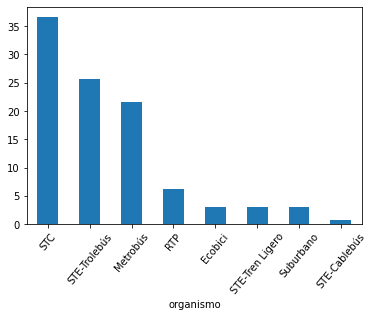

In [ ]:
cols_data_null('afluencia_tarjeta')

¿Cómo se distribuyen las columnas de afluencia_tarjeta, afluencia_boleto y afluencia_total_preliminar? ¿En dónde está el promedio? ¿Se concentran más en los valores altos o bajos? Crea un histograma con 40 bins para cada columna, uno encima del otro (3 renglones, 1 columna).
hint: px.histogram o go.Histogram


In [ ]:
#df.groupby(['afluencia_tarjeta','afluencia_boleto','afluencia_total_preliminar']).agg([min, max,np.mean]).tail(30)
#(['Country/Region','Province/State'])
df.agg({'afluencia_boleto':[min, max, np.mean], 'afluencia_tarjeta':[min, max, np.mean], 'afluencia_total_preliminar':[min, max, np.mean]})

,afluencia_boleto,afluencia_tarjeta,afluencia_total_preliminar
min,0.000000,0.000000,0.000000
max,220628.000000,6278.000000,874324.000000
mean,24466.079489,1079.967622,81567.402388


In [ ]:
data_hist = df.iloc[::,[4,5,6,7]]
data_hist

,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,2020-03-01,NaN,NaN,11238.0
1,2020-03-02,NaN,NaN,29475.0
2,2020-03-03,NaN,NaN,31855.0
3,2020-03-04,NaN,NaN,31477.0
4,2020-03-05,NaN,NaN,31493.0
...,...,...,...,...
18709,2021-06-28,NaN,NaN,NaN
18710,2021-06-29,NaN,NaN,NaN
18711,2021-06-30,NaN,NaN,NaN
18712,2021-07-01,NaN,NaN,NaN


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x = data_hist['afluencia_tarjeta'], nbinsx = 40, name = 'afluencia tarjeta'))
fig.add_trace(go.Histogram(x = data_hist['afluencia_boleto'], nbinsx = 40, name = 'afluencia boleto'))
fig.add_trace(go.Histogram(x = data_hist['afluencia_total_preliminar'], nbinsx = 40, name = 'afluencia total preliminar'))

#layout

fig.update_layout(
    barmode = 'overlay',
    xaxis_title = 'Distribucion',
    yaxis_title = 'Average',
    title = 'Distribuciones de afluencias',
)
#traces
fig.update_traces(opacity = 0.75)

fig.show()

Para continuar con el análisis de estas columnas, crea un boxplot de dichas columnas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          18714 non-null  int64         
 1   organismo                   18714 non-null  object        
 2   linea_servicio              18225 non-null  object        
 3   dia                         18714 non-null  object        
 4   fecha                       18714 non-null  datetime64[ns]
 5   afluencia_tarjeta           2687 non-null   float64       
 6   afluencia_boleto            3598 non-null   float64       
 7   afluencia_total_preliminar  18512 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df_bx = df.iloc[::,[3,7]]
df_bx

,dia,afluencia_total_preliminar
0,Domingo,11238.0
1,Lunes,29475.0
2,Martes,31855.0
3,Miércoles,31477.0
4,Jueves,31493.0
...,...,...
18709,Lunes,NaN
18710,Martes,NaN
18711,Miércoles,NaN
18712,Jueves,NaN


¿Cuál es el día con más usuarios del transporte público? Pega aquí el número de usuarios de transporte público (en total) por día

In [ ]:
import plotly.express as px

fig = px.box(df_bx, x = 'dia', y = 'afluencia_total_preliminar')

fig.show()

Instrucciones
Responde a las siguientes preguntas:
¿Cuál es la combinación de día y método de transporte público con más usuarios en promedio? Visualizalo en un heatmap, como el siguiente visualizando la suma de afluencia_total_preliminar y pega el código para generarlo en esta diapositiva y responde a la pregunta inicial

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          18714 non-null  int64         
 1   organismo                   18714 non-null  object        
 2   linea_servicio              18225 non-null  object        
 3   dia                         18714 non-null  object        
 4   fecha                       18714 non-null  datetime64[ns]
 5   afluencia_tarjeta           2687 non-null   float64       
 6   afluencia_boleto            3598 non-null   float64       
 7   afluencia_total_preliminar  18512 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df_heat = df.iloc[::,[1,3,7]]
df_heat

,organismo,dia,afluencia_total_preliminar
0,Ecobici,Domingo,11238.0
1,Ecobici,Lunes,29475.0
2,Ecobici,Martes,31855.0
3,Ecobici,Miércoles,31477.0
4,Ecobici,Jueves,31493.0
...,...,...,...
18709,Suburbano,Lunes,NaN
18710,Suburbano,Martes,NaN
18711,Suburbano,Miércoles,NaN
18712,Suburbano,Jueves,NaN


In [ ]:
df_heatmap = df.groupby(['organismo','dia'])['afluencia_total_preliminar'].sum().unstack().fillna(0)
df_heatmap.head()

dia,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes
organismo,,,,,,,
Ecobici,444516.0,757033.0,693754.0,769180.0,762968.0,516567.0,728800.0
Metrobús,24462493.0,47483119.0,46490218.0,48994907.0,48846133.0,36897618.0,48728230.0
RTP,6686480.0,15125504.0,14639670.0,15272436.0,15119150.0,9515210.0,14572377.0
STC,89729307.0,160920479.0,152645796.0,160160259.0,161665956.0,138793167.0,159007291.0
STE-Cablebús,81905.0,48668.0,49899.0,48895.0,41785.0,58935.0,54961.0


In [ ]:
import plotly.express as px

fig = px.imshow(df_heatmap, x = df_heatmap.columns , y = df_heatmap.index, labels = dict(x = 'Dias', y = 'Organismos', color = 'Aluencia Total Preliminar'))

fig.update_xaxes(side="bottom")

fig.show()

Responde a las siguientes preguntas:
¿Cuál es la combinación de organismo y línea de servicio con más usuarios? Realiza el mismo ejercicio (utiliza .sum() ), pero con estas columnas ahora. Responde con la combinación más utilizada y su valor en el heatmap.

¿Cómo crees que el cierre de la línea 1 afecte a los usuarios del transporte público de la CDMX?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          18714 non-null  int64         
 1   organismo                   18714 non-null  object        
 2   linea_servicio              18225 non-null  object        
 3   dia                         18714 non-null  object        
 4   fecha                       18714 non-null  datetime64[ns]
 5   afluencia_tarjeta           2687 non-null   float64       
 6   afluencia_boleto            3598 non-null   float64       
 7   afluencia_total_preliminar  18512 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
#Alternativa para configurar el df del HeatMap
#df_heatmap2 = df.groupby(['linea_servicio','organismo'])['afluencia_total_preliminar'].sum().reset_index()#agg("sum").unstack()
#df_heatmap2 = df_heatmap2.pivot(index = 'linea_servicio', columns = 'organismo')['afluencia_total_preliminar'].fillna(0)
#df_heatmap2.head()

In [ ]:
df_heatmap2 = df.groupby(['linea_servicio','organismo'])['afluencia_total_preliminar'].sum().unstack().fillna(0)
df_heatmap2.head()

organismo,RTP,Metrobús,STC,Suburbano,STE-Cablebús,STE-Trolebús,STE-Tren Ligero
linea_servicio,,,,,,,
Atenea,4765065.0,0.0,0.0,0.0,0.0,0.0,0.0
Eco Atenea,186653.0,0.0,0.0,0.0,0.0,0.0,0.0
Ecobús,9181715.0,0.0,0.0,0.0,0.0,0.0,0.0
Expreso,24647012.0,0.0,0.0,0.0,0.0,0.0,0.0
Expreso Directo,368123.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
fig = px.imshow(df_heatmap2, x = df_heatmap2.columns, y = df_heatmap2.index, aspect = "auto", width = 900, height = 900, labels = dict(x = 'Organismos', y = 'Lineas de Servicio', color = ' Afluencia Total Preliminar'))
fig.update_xaxes(side="bottom")

fig.show()

**¿Cuál es la línea de servicio más utilizada? ¿Qué porcentaje de todas las líneas constituye esta línea? ¿El cierre de la línea 1 del Metro afectará fuertemente a los usuarios?**


In [ ]:
df1 = pd.DataFrame(df, columns = ['id', 'linea_servicio']).dropna()
df1['percent'] = (df1['id'] / df1['id'].sum()) * 100

percent_linea_servicio = (df.linea_servicio.value_counts() / df.linea_servicio.value_counts().sum()) * 100
percent_linea_servicio

L1                                                   8.049383
L5                                                   5.366255
L7                                                   5.366255
L6                                                   5.366255
L2                                                   5.366255
L4                                                   5.366255
L3                                                   5.366255
L1 Eje Central                                       2.683128
L6 Rosario-Chapultepec                               2.683128
L12                                                  2.683128
LB                                                   2.683128
LA                                                   2.683128
L9                                                   2.683128
L8                                                   2.683128
L4 Pto Aéreo-Rosario                                 2.683128
L5 Sn Felipe-Hidalgo                                 2.683128
Xochimil

# SECCION 3 TRANSFORMACION DE DATOS

**Instrucciones :
Regresando al tratamiento de valores nulos, como un experimento, elimina todos los registros / renglones que tengan al menos un valor nulo en alguna columna. Si hacemos esto, ¿qué porcentaje de datos limpios tendríamos con respecto al original?
Hint: utiliza df.dropna(how = “any”)**


In [ ]:
df_original = df.shape[0]
df_original

18714

In [ ]:
df_cleaned = df.dropna(how ="any")
df_cleaned.shape[0]

2686

In [ ]:
df_percent_cleared = (df_cleaned.shape[0] / df.shape[0] * 100)
df_percent_cleared

14.352890883830288

**Instrucciones :
¿Cuántos valores duplicados hay? Después, elimina todos los valores duplicados.
Hint: utiliza .duplicated() para revisar cuántos duplicados hay, y después, drop_duplicates(subset=<una lista con las columnas que quieres verificar que no sedupliquen>) para eliminarlos**


In [ ]:
df.duplicated().sum()

0

**Instrucciones :
Cambia el formato de la columna “Fecha”. Recuerda utilizar el formato adecuado para la fecha. Una vez hecho éso, pega aquí los días de cada registro y el día de la semana
Hint: utiliza .dt.day y dt.weekday**


In [ ]:
day_week = df['fecha'].dt.weekday

In [ ]:
day= df['fecha'].dt.day

In [ ]:
days_df=pd.concat([df['fecha'],day,day_week], axis = 1)
days_df.columns = ['Fecha', 'day', 'day week']

days_df.head()

,Fecha,day,day week
0,2020-03-01,1,6
1,2020-03-02,2,0
2,2020-03-03,3,1
3,2020-03-04,4,2
4,2020-03-05,5,3


In [ ]:
df['Day'] = day
df['Day Week'] = day_week

In [ ]:
df = df [['id', 'organismo', 'linea_servicio','fecha', 'dia','Day','Day Week','afluencia_tarjeta', 'afluencia_boleto', 'afluencia_total_preliminar']]
df

,id,organismo,linea_servicio,fecha,dia,Day,Day Week,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,NaN,2020-03-01,Domingo,1,6,NaN,NaN,11238.0
1,2,Ecobici,NaN,2020-03-02,Lunes,2,0,NaN,NaN,29475.0
2,3,Ecobici,NaN,2020-03-03,Martes,3,1,NaN,NaN,31855.0
3,4,Ecobici,NaN,2020-03-04,Miércoles,4,2,NaN,NaN,31477.0
4,5,Ecobici,NaN,2020-03-05,Jueves,5,3,NaN,NaN,31493.0
...,...,...,...,...,...,...,...,...,...,...
18709,18710,Suburbano,L1,2021-06-28,Lunes,28,0,NaN,NaN,NaN
18710,18711,Suburbano,L1,2021-06-29,Martes,29,1,NaN,NaN,NaN
18711,18712,Suburbano,L1,2021-06-30,Miércoles,30,2,NaN,NaN,NaN
18712,18713,Suburbano,L1,2021-07-01,Jueves,1,3,NaN,NaN,NaN


**Instrucciones :
Ahora, continuando con la limpieza de datos, es posible que se tenga un renglón en donde, por ejemplo, "Metrobús" aparezca duplicado. Es decir, "MetrobúsMetrobús", por error. O, en su contraparte, que queramos seleccionar todas las variantes de Metrobús, en caso de existir. Por ejemplo: "Metrobús-Sur", "Metrobús-Norte" se pueden agrupar en una sola variable llamada "Metrobús". Esto se hace buscando si la celda contiene la palabra "Metrobús". Revisa en la celda de organismo cuáles renglones contienen la palabra "Metrobús" y pega aquí cuántos hay.**


In [ ]:
df_metrobus = df['organismo'].str.contains('Metrobús')
df_metrobus.sum()

3461

**Instrucciones :
Realiza el mismo ejercicio que anteriormente, pero con la palabra “Temporal”. ¿Cuántas líneas temporales diferentes hay?**


In [ ]:
df_metrobus = df['linea_servicio'].str.contains('Temporal')
df_metrobus.sum()

155

**Instrucciones :
Agrupa por días, y suma la columna de afluencia_total_preliminar para todos los organismos y líneas de servicio. De esta forma tendrás un dataframe con dos columnas: la fecha y la afluencia_total_preliminar de todos los organismos. Grafica estos en una serie de tiempo. ¿Afectó el COVID-19 al uso del transporte público? ¿Sí o no? ¿Se puede notar algún incremento o decremento en el uso por la salida o introducción de las diferentes olas? Copia el código para generar esta gráfica aquí**


In [ ]:

from matplotlib import pyplot

df_time = df.groupby('fecha')['afluencia_total_preliminar'].sum().fillna(0)

#df_time.plot()
#pyplot.title('grafiquita')
#pyplot.show

fig = px.line(df_time,)
fig.show()


